In [ ]:
!pip install gym
!pip install gym[box2d]

In [3]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing

In [4]:
g = gym.make("Blackjack-v1", render_mode="rgb_array")

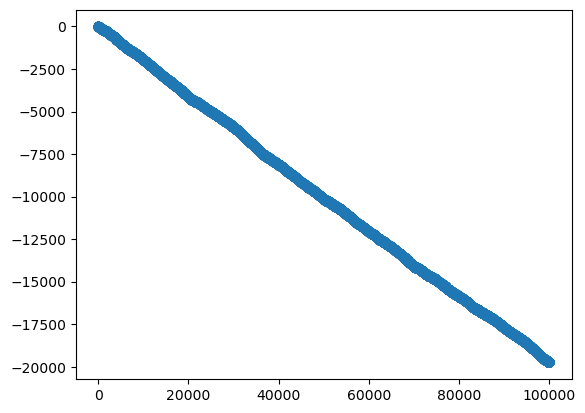

In [3]:
g.action_space.seed(42)

observation, info = g.reset(seed=42)
rewards = []
total_reward = 0
for game in range(100000):
    terminated = False
    truncated = False
    observation, info = g.reset()
        
    while not terminated or truncated:

        if observation[0] in [19, 20, 21]:
            observation, reward, terminated, truncated, info = g.step(0)
        else:
            observation, reward, terminated, truncated, info = g.step(1)
  
    
    total_reward += reward
    rewards.append(total_reward)
        

plt.scatter(range(len(rewards)),rewards )        

In [4]:
def new_pi(init=False):
    card_values = [x for x in range(1,12)]
    possible_scores = [x for x in range(1,23)]  # + перебор
    p = {}
    for cv in card_values:
        for ps in possible_scores:
            p[(ps,cv,False)] = np.random.random() if init else 0.0
            p[(ps,cv,True)] = np.random.random() if init else 0.0
    return(p)

In [9]:
g.action_space.seed()
n_games_in_step = 10000
n_steps = 1000
step = 1e-4

rewards = []

pi_trainable = new_pi(init=True) 

for training_step in range(n_steps):
    total_reward = 0
    pi_exp = new_pi(init=False)
    
    for game in range(n_games_in_step):
        terminated = False
        truncated = False
        observation, info = g.reset()
        pi_current = new_pi(init=False)
        used_keys = set()
        while not terminated or truncated:
            rnd_action=np.random.random()
            score = observation[0] if observation[0] < 22 else 22
            key = (score,observation[1], observation[2])
            used_keys.add(key)
            #print((score, observation[1]))
            if rnd_action < pi_trainable[key]:
                observation, reward, terminated, truncated, info = g.step(1)
                pi_current[(score,observation[1], observation[2])] += 1
                #print((score,observation[1]), pi_current[(score,observation[1])]) 
            else:
                observation, reward, terminated, truncated, info = g.step(0)
                pi_current[(score, observation[1], observation[2])] -= 1
            #if ((score,observation[1]) == (20, 10)):
                #print(game, 'ZZZZ', pi_current[(score,observation[1])], pi_exp[(score,observation[1])])
          
        total_reward += reward
        for s in used_keys:            
            pi_exp[s] += pi_current[s] * reward 
    print(training_step, total_reward, pi_trainable[(20, 10, 0)], pi_current[(20, 10, 0)], pi_exp[(20, 10,0)]  )
    rewards.append(total_reward)
    for s in pi_trainable:
            pi_trainable[s] = np.clip(pi_trainable[s] + pi_exp[s] * step, 0, 1)  
            #print(s,pi_current[s] * step / n_games_in_step)
     
    
plt.scatter(range(len(rewards)),rewards )    


0 -4073.0 0.9098420893956988 0.0 -366.0
1 -3920.0 0.8732420893956988 0.0 -373.0
2 -3949.0 0.8359420893956988 0.0 -363.0
3 -3985.0 0.7996420893956988 0.0 -353.0
4 -3674.0 0.7643420893956988 0.0 -340.0
5 -3820.0 0.7303420893956988 1.0 -350.0
6 -3673.0 0.6953420893956987 0.0 -282.0
7 -3711.0 0.6671420893956987 0.0 -334.0
8 -3631.0 0.6337420893956988 0.0 -333.0
9 -3671.0 0.6004420893956988 0.0 -313.0
10 -3563.0 0.5691420893956988 0.0 -274.0
11 -3554.0 0.5417420893956988 0.0 -261.0
12 -3415.0 0.5156420893956988 0.0 -300.0
13 -3395.0 0.48564208939569875 0.0 -264.0
14 -3323.0 0.45924208939569877 0.0 -297.0
15 -3529.0 0.42954208939569877 0.0 -242.0
16 -3275.0 0.40534208939569877 0.0 -281.0
17 -3249.0 0.37724208939569875 0.0 -234.0
18 -3246.0 0.3538420893956988 0.0 -238.0
19 -3143.0 0.3300420893956988 0.0 -255.0
20 -3237.0 0.30454208939569877 0.0 -246.0
21 -3002.0 0.27994208939569876 0.0 -228.0
22 -3062.0 0.25714208939569877 0.0 -223.0
23 -3069.0 0.23484208939569878 0.0 -214.0
24 -3025.0 0.2134

KeyboardInterrupt: 

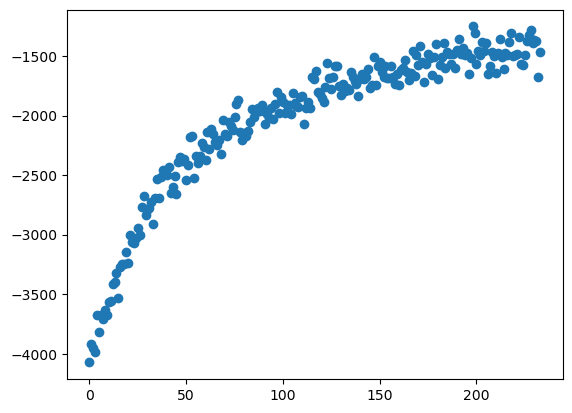

In [10]:
plt.scatter(range(len(rewards)),rewards )    

In [6]:
def new_pi_double(init=False):
    card_values = [x for x in range(1,12)]
    possible_scores = [x for x in range(1,23)]  # + перебор
    p = {}
    for cv in card_values:
        for ps in possible_scores:
            p[(ps,cv,False)] = np.array([[1, 1, 1],[0.33,0.33,0.33]]) if init else np.array([0, 0, 0])
            p[(ps,cv,True)] = np.array([[1, 1, 1],[0.33,0.33,0.33]]) if init else np.array([0, 0, 0])
    return(p)

In [2]:
import parallel_game
dir(parallel_game)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'game',
 'gym',
 'multiprocessing',
 'np',
 'plt']

In [7]:
g.action_space.seed()
n_games_in_step = 100000
n_steps = 100
step = 1e-2

rewards = []

pi_trainable = new_pi_double(init=True)
#print(pi_trainable)


for training_step in range(n_steps):
    total_reward = 0
    pi_exp = new_pi_double(init=False)
    global_keys = set()
    if __name__ == '__main__':
        with multiprocessing.Pool(8) as p:
            game_results = p.map(parallel_game.game(pi_trainable),[x for x in range(n_games_in_step)])
        print(game_results[0])
            #if ((score,observation[1]) == (20, 10)):
                #print(game, 'ZZZZ', pi_current[(score,observation[1])], pi_exp[(score,observation[1])])
            
    total_reward += reward * multiplyer
    #if (7, 7,False) in used_keys:
    #    print('l', len(used_keys), states, actions, reward * multiplyer)
    global_keys.update(used_keys)
    for s in used_keys:            
        pi_exp[s] = pi_exp[s] + pi_current[s] * reward 
    #print((score,observation[1], observation[2]), action_ranges, rnd_action)  
    print(len(global_keys),training_step, total_reward, pi_trainable[(7, 7, False)],  pi_exp[(7, 7,False)]  )       
    for s in global_keys:
            #print('zzz', pi_exp[s], pi_trainable[s])
            pi_trainable[s][0] = np.clip(pi_trainable[s][0] + pi_exp[s]*step , 0.01, 1000)
            pi_trainable[s][1] = pi_trainable[s][0] / np.sum(pi_trainable[s][0])
            #print(s, pi_trainable[s][0], pi_trainable[s][1])
            #print(s,pi_current[s] * step / n_games_in_step)
    rewards.append(total_reward)
    
plt.scatter(range(len(rewards)),rewards ) 

NameError: name 'action_ranges' is not defined

In [ ]:
g.action_space.seed()
n_games_in_step = 100000
n_steps = 400
step = 1e-4

rewards = []

#pi_trainable = new_pi_double(init=True)
#print(pi_trainable)
pool = multiprocessing.Pool(8)

for training_step in range(n_steps):
    total_reward = 0
    pi_exp = new_pi_double(init=False)
    global_keys = set()
    for game in range(n_games_in_step):
        terminated = False
        truncated = False
        observation, info = g.reset()
        pi_current = new_pi_double(init=False)
        used_keys = set()
        actions = []
        states = []
        multiplyer = 1
        while not (terminated or truncated):
            rnd_action=np.random.random()
            score = observation[0] if observation[0] < 22 else 22
            action_array = pi_trainable[(score, observation[1], observation[2])][1]
            key = (score,observation[1], observation[2])
            used_keys.add(key)
            states.append(key)
            #print((score, observation[1]))
            action_ranges = pi_trainable[key][1]
            if rnd_action < action_ranges[0]:
                #do hit
                observation, reward, terminated, truncated, info = g.step(1)
                pi_current[key][0] += 1
                actions.append('take')
                #print((score,observation[1]), pi_current[(score,observation[1])]) 
            elif action_ranges[0] <= rnd_action < (action_ranges[0]+action_ranges[1]):
                #stop
                observation, reward, terminated, truncated, info = g.step(0)
                pi_current[key][1] += 1
                actions.append('check')
            else:
                #double
                pi_current[key][2] += 1
                observation, reward, terminated, truncated, info = g.step(1)
                key = (observation[0],observation[1], observation[2])
             
                states.append(key)
                if not (terminated or truncated):
                    observation, reward, terminated, truncated, info = g.step(0)
                multiplyer=2   
                actions.append('double')
            #if ((score,observation[1]) == (20, 10)):
                #print(game, 'ZZZZ', pi_current[(score,observation[1])], pi_exp[(score,observation[1])])
            
        total_reward += reward * multiplyer
        #if (7, 7,False) in used_keys:
        #    print('l', len(used_keys), states, actions, reward * multiplyer)
        global_keys.update(used_keys)
        
        mx_pv = -n_games_in_step
        for s in used_keys: 
            if np.max(pi_current[s] * reward * multiplyer) > mx_pv:
                mx_pv = np.max(pi_current[s] * reward * multiplyer)
                max_key = s
        #print(max_key)
        global_keys.add(max_key)
        pi_exp[max_key] = pi_exp[max_key] + pi_current[max_key] * reward * multiplyer
    #print((score,observation[1], observation[2]), action_ranges, rnd_action)  
    print(len(global_keys),training_step, total_reward, pi_trainable[(12, 10, False)],  pi_exp[(12, 10, False)]  )       
    for s in global_keys:
        #print('zzz', pi_exp[s], pi_trainable[s])
        pi_trainable[s][0] = pi_trainable[s][0] + pi_exp[s]*step 
        new_sum = np.sum(pi_trainable[s][0])
        pi_trainable[s][0] = np.clip(pi_trainable[s][0], 0.00000000001, 1000) 
        while (new_sum < 0.3):
            pi_trainable[s][0] = pi_trainable[s][0] * 1000  
            new_sum = np.sum(pi_trainable[s][0])
            print('fix_small', s, pi_trainable[s])
        if new_sum > 1000:
            pi_trainable[s][0] = pi_trainable[s][0] / 1000 
            print('fix_big', s)
        pi_trainable[s][0] = np.clip(pi_trainable[s][0], 0.0000001, 1000)    
        pi_trainable[s][1] = pi_trainable[s][0] / np.sum(pi_trainable[s][0])
            #print(s, pi_trainable[s][0], pi_trainable[s][1])
            #print(s,pi_current[s] * step / n_games_in_step)
    rewards.append(total_reward)
    
plt.scatter(range(len(rewards)),rewards ) 

280 0 -10970.0 [[9.001      8.977      8.426     ]
 [0.34089532 0.33998637 0.31911832]] [ -530.  -620. -1008.]
280 1 -10570.0 [[8.948      8.915      8.3252    ]
 [0.3416806  0.34042049 0.3178989 ]] [-579. -606. -854.]
280 2 -11299.0 [[8.8901     8.8544     8.2398    ]
 [0.34213352 0.34075961 0.31710687]] [-598. -636. -898.]
280 3 -11123.0 [[8.8303     8.7908     8.15      ]
 [0.3426435  0.34111078 0.31624572]] [-481. -596. -870.]
280 4 -10054.0 [[8.7822     8.7312     8.063     ]
 [0.34337123 0.34137721 0.31525156]] [-564. -642. -854.]
280 5 -10544.0 [[8.7258     8.667      7.9776    ]
 [0.34393624 0.34161858 0.31444518]] [-553. -574. -890.]
280 6 -10222.0 [[8.6705     8.6096     7.8886    ]
 [0.34449535 0.34207567 0.31342898]] [-521. -678. -810.]
280 7 -10360.0 [[8.6184     8.5418     7.8076    ]
 [0.34518059 0.34211264 0.31270677]] [-528. -702. -856.]
280 8 -11009.0 [[8.5656     8.4716     7.722     ]
 [0.34595625 0.34215968 0.31188407]] [-573. -593. -852.]
280 9 -11018.0 [[8.5083  

In [48]:
pi_trainable = pi_trainable_backup.copy()

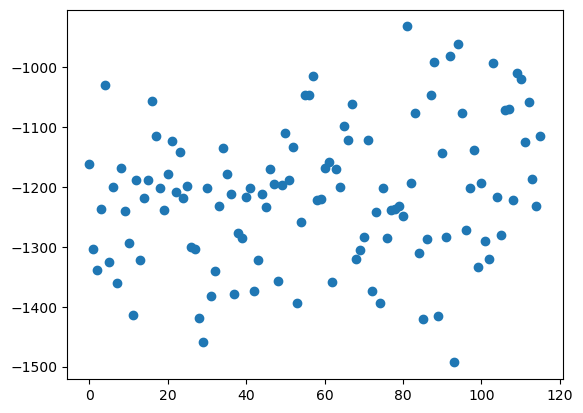

In [47]:

plt.scatter(range(len(rewards)),rewards ) 